**Import Libraries and modules**

In [0]:
# Import the necessary packages

# https://keras.io/
!pip install -q keras
import keras

In [0]:
# Importing necessary modules from the library 
import numpy as np

from keras.models import Sequential #Sequential model is a linear stack of layers.
from keras.layers import Dense, Dropout, Activation, Flatten, Add 
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()  # split the dataset into testing and training samples

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


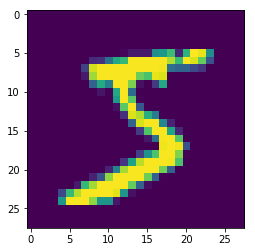

In [5]:
print (X_train.shape) 
from matplotlib import pyplot as plt # Matplotlib is a Python 2D plotting library. 
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
#Changing the size of array to include channel information

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255 # making values 0 to 1 , normalising it so while multiplying value doesn't increase

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [29]:
from keras.layers import Activation
model = Sequential()


 #8 convolution filters of size 3x3
model.add(Convolution2D(8, 3, 3, input_shape=(28,28,1)))  #Output image : 26x26x8 , RF: 3x3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(12, 3, 3)) #24x24x12 , RF: 5x5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3)) #22x22x16 , RF: 7x7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(MaxPooling2D(2)) #11x11x16 , RF: 14x14

model.add(Convolution2D(20, 3, 3)) #9x9x20, RF: 16x16
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(24, 3, 3)) #7x7x24 , RF: 18x18
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1)) #7x7x10 , RF:18x18

model.add(Convolution2D(10, 7))#1x1x10, RF:28x28
model.add(Flatten()) #Converts input shape (1,1,10) to 1D of 10
model.add(Activation('softmax'))  # input to Softmax is 10X1
 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3))`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3))`


In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_11 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
activation_13 (Activation)   (None, 26, 26, 8)         0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 12)        876       
_________________________________________________________________
batch_normalization_12 (Batc (None, 24, 24, 12)        48        
_________________________________________________________________
activation_14 (Activation)   (None, 24, 24, 12)        0         
__________

In [0]:
# Configure the learning process, using the compile method.
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [14]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1) # Train the model, iterating on the data in batches of 32 samples for 10 epochs

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 24s 399us/step - loss: 0.1677 - acc: 0.9482
Epoch 2/10
60000/60000 [==============================] - 20s 338us/step - loss: 0.0644 - acc: 0.9804
Epoch 3/10
60000/60000 [==============================] - 20s 329us/step - loss: 0.0503 - acc: 0.9847
Epoch 4/10
60000/60000 [==============================] - 20s 329us/step - loss: 0.0425 - acc: 0.9861
Epoch 5/10
60000/60000 [==============================] - 20s 339us/step - loss: 0.0392 - acc: 0.9873
Epoch 6/10
60000/60000 [==============================] - 20s 339us/step - loss: 0.0339 - acc: 0.9896
Epoch 7/10
60000/60000 [==============================] - 20s 329us/step - loss: 0.0296 - acc: 0.9904
Epoch 8/10
60000/60000 [==============================] - 21s 342us/step - loss: 0.0293 - acc: 0.9902
Epoch 9/10
60000/60000 [==============================] - 20s 341us/step - loss: 0.0267 - acc: 0.9914
Epoch 10/10
60000/60000 [==============================] - 20s 338us/step - loss: 

In [15]:
model.fit(X_train, Y_train, batch_size=256, nb_epoch=10, verbose=1) # Train the model, iterating on the data in batches of 256 samples for 10 epochs

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.0164 - acc: 0.9946
Epoch 2/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0136 - acc: 0.9955
Epoch 3/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0139 - acc: 0.9954
Epoch 4/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.0124 - acc: 0.9961
Epoch 5/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0123 - acc: 0.9961
Epoch 6/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0121 - acc: 0.9962
Epoch 7/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0116 - acc: 0.9964
Epoch 8/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.0113 - acc: 0.9965
Epoch 9/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0114 - acc: 0.9966
Epoch 10/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.0112 - acc: 0.9965

In [16]:
# Score is the evaluation of the loss function for a given input.
score = model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 1s 82us/step


In [17]:
print(score)  # [Loss/Cross Entropy Value, Accuracy]

[0.01678919986393066, 0.9952]


In [0]:
y_pred = model.predict(X_test)

In [19]:
print(y_pred[:9])
print(y_test[:9])

[[1.79254986e-10 1.36901055e-11 1.17617894e-07 4.46716172e-07
  1.06113374e-13 9.94168983e-11 1.30194332e-15 9.99999285e-01
  4.60263043e-11 1.35708405e-07]
 [8.60095895e-07 5.31272839e-08 9.99998927e-01 6.03874242e-11
  1.61955588e-11 2.54447554e-15 1.32170953e-07 5.71503088e-12
  2.62971138e-11 5.31524130e-12]
 [1.91184790e-06 9.99994397e-01 2.23418667e-07 7.41641504e-09
  1.08559004e-06 6.61139854e-09 1.96721430e-06 1.75500347e-07
  2.91906730e-08 2.45125506e-07]
 [9.99992609e-01 1.68571285e-11 4.68007393e-08 2.83879503e-10
  3.91519750e-09 6.64524302e-09 6.80347694e-06 1.30467803e-09
  2.18298872e-08 6.25046823e-07]
 [7.85629699e-13 3.18544413e-10 7.15441638e-12 2.52092347e-13
  9.99993086e-01 6.08798832e-14 5.61452218e-10 1.47420878e-11
  3.43742118e-10 6.89843773e-06]
 [5.59554394e-07 9.99997854e-01 1.23609581e-07 4.05474376e-10
  5.82694668e-07 1.88838431e-10 2.97078770e-07 3.75047051e-07
  9.09324527e-09 1.59848639e-07]
 [2.69707255e-15 5.99301053e-09 1.58889166e-10 3.75665075e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

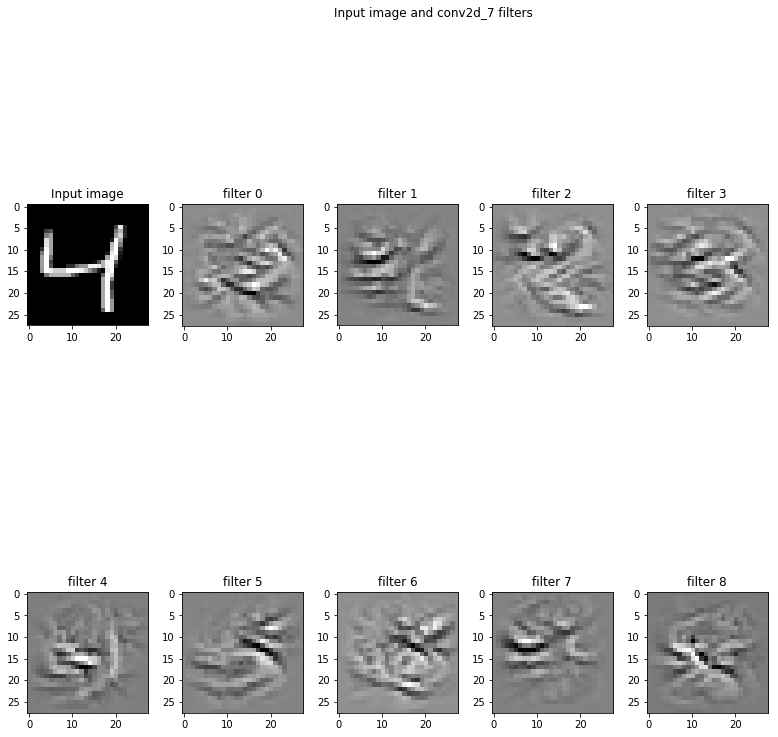

In [26]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_7'): # change layer name according to whichever needs to be visualised
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] == 10:  # according to number of kernels in the layer, change the threshold. 
        plot_x, plot_y = 2, 5
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()